# Estimating the number of clusters with Mean Shift algorithm

__Mean Shift__ is a powerful algorithm used in unsupervised learning. It is a non-parametric algorithm used frequently for clustering. It is non-parametric because it does not make any assumptions about the underlying distributions. This is in contrast to parametric techniques, where we assume that the underlying data follows a standard probability distribution. Mean Shift finds a lot of applications in fields like __object tracking and real-time data analysis.__



The goal of Mean Shift is to identify the location of centroids. For each data point in the training dataset, it defines a window around it. It then computes the centroid for this window and updates the location to this new centroid. It then repeats the process for this new location by defining a window around it. As we keep doing this, we move closer to the peak of the cluster. Each data point will move towards the cluster it belongs to. The movement is towards a region of higher density.

We keep shifting the centroids, also called means, towards the peaks of each cluster. Since we keep shifting the means, it is called Mean Shift! We keep doing this until the algorithm converges, at which stage the centroids don't move anymore.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import MeanShift, estimate_bandwidth 
from itertools import cycle 

Load Input Data 

In [3]:
# Load data from input file 
X = np.loadtxt('data_clustering.txt', delimiter=',') 

Estimate the bandwidth of the input data. Bandwidth is a parameter of the underlying kernel density estimation process used in Mean Shift algorithm. The bandwidth affects the overall convergence rate of the algorithm and the number of clusters that we will end up with in the end. Hence this is a crucial parameter. If the bandwidth is small, it might results in too many clusters, where as if the value is large, then it will merge distinct clusters.

The quantile parameter impacts how the bandwidth is estimated. A higher value for quantile will increase the estimated bandwidth, resulting in a lesser number of clusters:

In [4]:
# Estimate the bandwidth of X 
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X)) 

Let's train the Mean Shift clustering model using the estimated bandwidth:

In [5]:
# Cluster data with MeanShift 
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True) 
meanshift_model.fit(X) 

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

Extract the centers of all the clusters:

In [6]:
# Extract the centers of clusters 
cluster_centers = meanshift_model.cluster_centers_ 
print('\nCenters of clusters:\n', cluster_centers) 


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]


Extract the number of clusters:

In [7]:
# Estimate the number of clusters 
labels = meanshift_model.labels_ 
num_clusters = len(np.unique(labels)) 
print("\nNumber of clusters in input data =", num_clusters) 


Number of clusters in input data = 5


Visualize the data points:

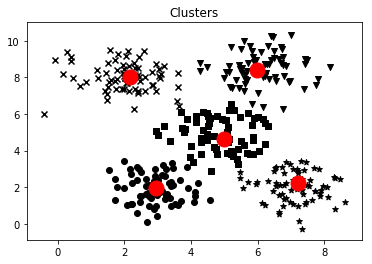

In [11]:
# Plot the points and cluster centers 
plt.figure() 
markers = 'o*xvs' 
for i, marker in zip(range(num_clusters), markers): 
    # Plot points that belong to the current cluster 
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black') 
    # Plot the cluster center 
    cluster_center = cluster_centers[i] 
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
            markerfacecolor='red', markeredgecolor='red',  
            markersize=15) 

plt.title('Clusters') 
plt.show() 